In [ ]:
!pip install cluster
!pip install kmedoids
!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.3/434.3 kB 7.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import warnings
import pandas as pd
from sklearn.preprocessing import scale
from pandas import DataFrame
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster import hierarchy
import cluster
import kmedoids
import gower
import copy
from scipy.cluster import hierarchy
from sklearn.model_selection import cross_val_score


In [ ]:
raw_df = pd.read_csv("heart_disease_patients.csv")

warnings.filterwarnings('ignore')


raw_df = raw_df.drop(raw_df.columns[0], axis=1) #usuwamy kolumnę id

print(raw_df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
dtype: object


In [ ]:
raw_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [ ]:
df = copy.deepcopy(raw_df)
df

df['sex'] = np.where(df['sex']==1, 'val1',
                   np.where(df['sex']==0, 'val0', 'val'))
df['cp'] = np.where(df['cp']==1, 'val1',
                    np.where(df['cp']==2, 'val2',
                    np.where(df['cp']==3, 'val3',
                    np.where(df['cp']==4, 'val4', 'val'))))
df['fbs'] = np.where(df['fbs']==1, 'val1',
                    np.where(df['fbs']==0, 'val0', 'val'))
df['restecg'] = np.where(df['restecg']==0, 'val0',
                    np.where(df['restecg']==1, 'val1',
                    np.where(df['restecg']==2, 'val2', 'val')))
df['exang'] = np.where(df['exang']==1, 'val1',
                    np.where(df['exang']==0, 'val0', 'val'))
df['slope'] = np.where(df['slope']==3, 'val3',
                    np.where(df['slope']==1, 'val1',
                    np.where(df['slope']==2, 'val2', 'val')))


In [ ]:
print(df.dtypes)
df.describe()

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
dtype: object


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
distance_matrix = gower.gower_matrix(df)
raw_distance_matrix = gower.gower_matrix(raw_df)
print(distance_matrix)
print()
print(raw_distance_matrix)

[[0.         0.43595368 0.4124552  ... 0.54036194 0.43886662 0.47871193]
 [0.43595368 0.         0.0768382  ... 0.17700507 0.39556906 0.5275688 ]
 [0.4124552  0.0768382  0.         ... 0.16900854 0.37104738 0.5138635 ]
 ...
 [0.54036194 0.17700507 0.16900854 ... 0.         0.44396874 0.38255075]
 [0.43886662 0.39556906 0.37104738 ... 0.44396874 0.         0.4198371 ]
 [0.47871193 0.5275688  0.5138635  ... 0.38255075 0.4198371  0.        ]]

[[0.         0.39049911 0.36700067 ... 0.49490738 0.332806   0.44840893]
 [0.39049911 0.         0.0768382  ... 0.17700507 0.36526603 0.42150822]
 [0.36700067 0.0768382  0.         ... 0.16900854 0.34074435 0.40780288]
 ...
 [0.49490738 0.17700507 0.16900854 ... 0.         0.4136657  0.27649012]
 [0.332806   0.36526603 0.34074435 ... 0.4136657  0.         0.3137765 ]
 [0.44840893 0.42150822 0.40780288 ... 0.27649012 0.3137765  0.        ]]


In [ ]:
# srednio punkt jest w odleglosci mniejszej niz 0.1 od 5.5 innych punktow
print((distance_matrix < 0.1).sum()/303)

xd = (distance_matrix < 0.2).sum(axis=1)

(xd > 5).sum()


6.4983498349834985


293

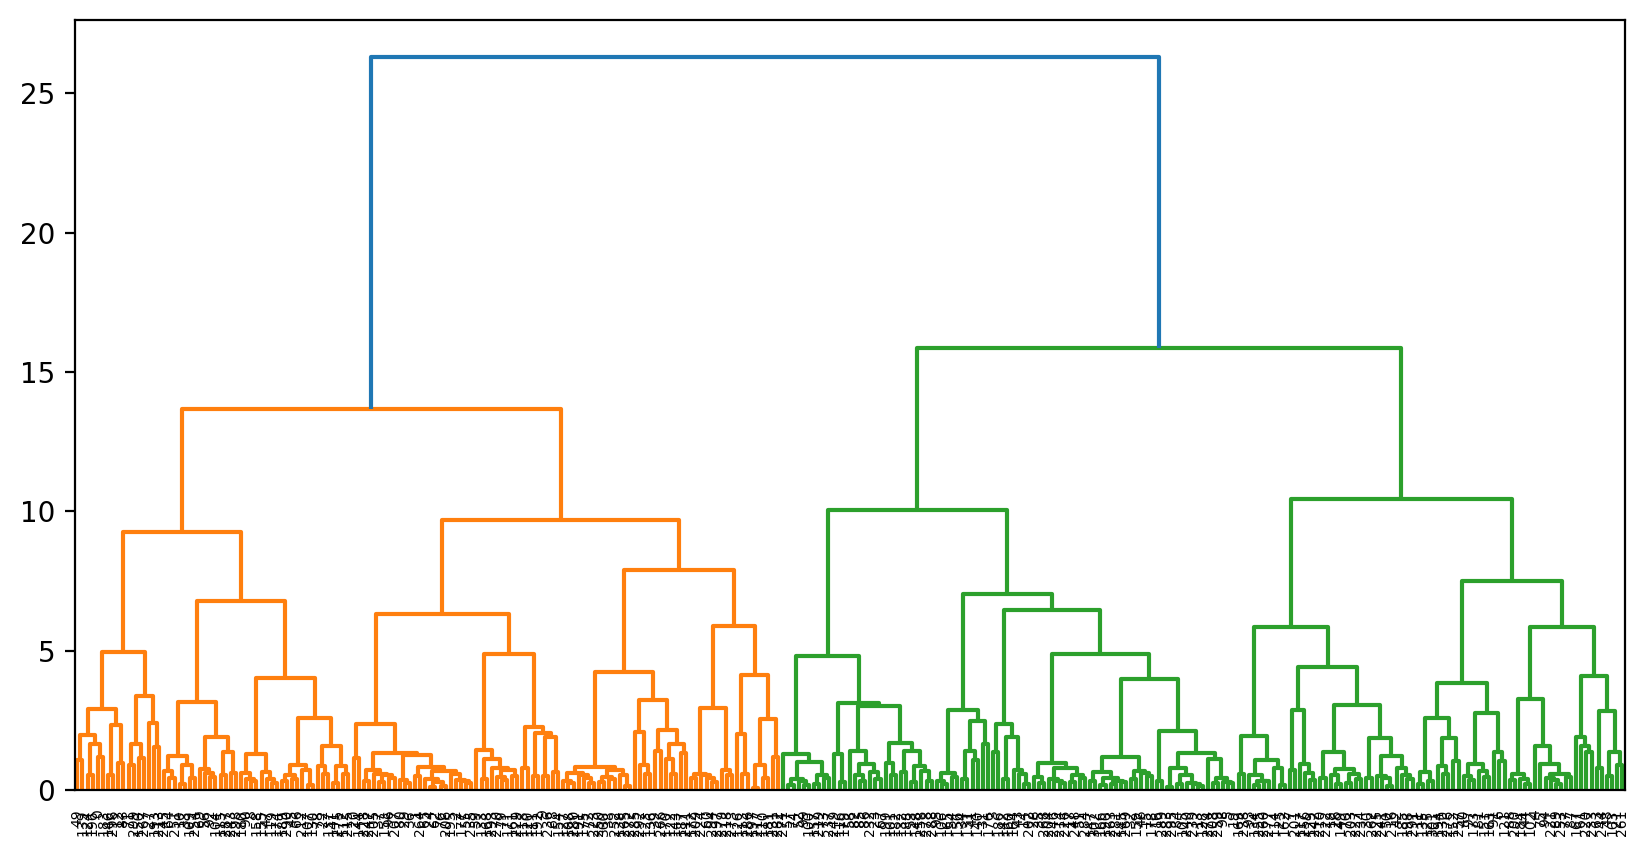

In [ ]:
Z = hierarchy.linkage(distance_matrix, method='ward')
plt.figure(figsize=(10,5), dpi=200)
hierarchy.dendrogram(Z)
plt.show()

In [ ]:

#Wyglada jak 4 albo 8, zaloze 4

agglModelGower = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglModelGower.fit(distance_matrix)
aggl_y = agglModelGower.labels_
aggl_y


TypeError: ignored

In [ ]:
agglModelGower = AgglomerativeClustering(n_clusters=4, linkage='ward')
aggl_y = agglModelGower.fit_predict(distance_matrix)
aggl_y

array([3, 1, 1, 2, 0, 2, 0, 0, 3, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       3, 2, 1, 0, 0, 3, 2, 1, 0, 2, 2, 3, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 3, 2, 3, 0, 3, 0, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 0, 1, 0, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 2, 0, 1, 0, 3, 1, 1, 0, 2, 3, 2, 2, 2, 0,
       0, 0, 3, 0, 3, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 3, 2, 2, 3, 1, 3,
       1, 1, 3, 1, 0, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 1, 2, 0, 3, 2,
       2, 1, 0, 0, 1, 3, 1, 3, 2, 3, 2, 1, 1, 2, 3, 2, 2, 0, 3, 0, 0, 1,
       1, 3, 2, 2, 3, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 1, 2, 2, 3, 1, 2, 3, 0, 0, 2, 1, 2, 3, 2, 1, 1, 3, 0, 1, 3, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 3, 3, 2, 3, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0,
       0, 3, 0, 3, 2, 1, 2, 2, 1, 3, 1, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 3, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 3, 2, 2, 3, 0, 1, 1, 1, 2, 3, 1, 3, 3, 1,

In [ ]:
clustered_df = copy.deepcopy(raw_df)
clustered_df['cluster'] = aggl_y

clustered_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster
0,63,1,1,145,233,1,2,150,0,2.3,3,3
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,3
299,68,1,4,144,193,1,0,141,0,3.4,2,3
300,57,1,4,130,131,0,0,115,1,1.2,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,0


In [ ]:
# Szybkie przejrzenie - wiek wydaje sie nie miec znaczenia, cholesterol maja prawie wszyscy za wysoki, restecg wychodzi rozlozone rownomiernie
# cluster 1 - choroba wiencowa? - dlawica piersiowa i mezczyzni, glownie bol typu 4 cokolwiek to znaczy, wysoki oldpeek, slope glownie 2
# cluster 0 - być może tachykardia - glownie kobiety i wysokie tetno krwi, niski oldpeek
# cluster 2 - nie mam pojecia - tylko wysokie tetno krwi, niski oldpeek, slope tylko 1
# cluster 3 - nie mam pojecia - wysokie spoczynkowe cisnienie krwi, czesto wysoki poziom cukru na czczo, wysoki oldpeek, slope glownie 2


dis1 = clustered_df[clustered_df['cluster'] == 1]
dis0 = clustered_df[clustered_df['cluster'] == 0]
dis2 = clustered_df[clustered_df['cluster'] == 2]
dis3 = clustered_df[clustered_df['cluster'] == 3]

In [ ]:
"""

Na potrzeby walidacji policzone metryki oceny klastrów, bo nie było jeszcze w projekcie. Mamy też zastrzeżenia do tego, że nie ma walidacji krzyżowej (cross-validation), tylko model jest uczony na całości dostępnych danych.

"""



#Tabelka podsumowująca metody:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
agg_clustering_silhouette = silhouette_score(distance_matrix, clustered_df['cluster'])
agg_clustering_calinski = calinski_harabasz_score(distance_matrix, clustered_df['cluster'])

# Tworzenie tabeli podsumowującej
data = {
    'Metoda': ['Agglomerative Clustering'],
    'Silhouette Score': [agg_clustering_silhouette],
    'Calinski-Harabasz Indedf': [agg_clustering_calinski]
}

summary_table = pd.DataFrame(data)
print(summary_table)

                     Metoda  Silhouette Score  Calinski-Harabasz Indedf
0  Agglomerative Clustering          0.212789                  83.17919


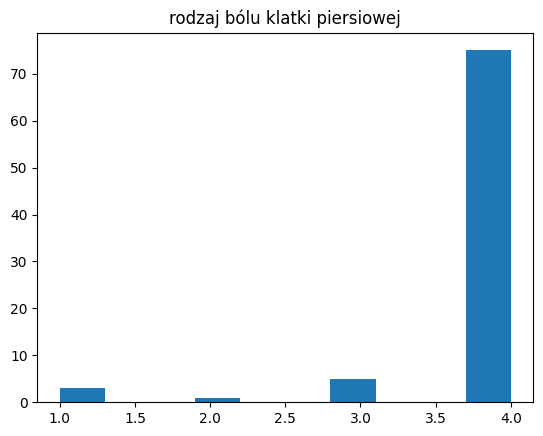

In [ ]:
plt.hist(dis1['cp'])
plt.title('rodzaj bólu klatki piersiowej')
plt.show()

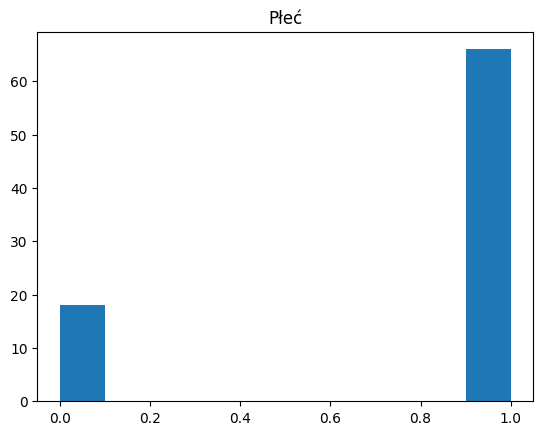

In [ ]:
plt.hist(dis1['sex'])
plt.title('Płeć')
plt.show()

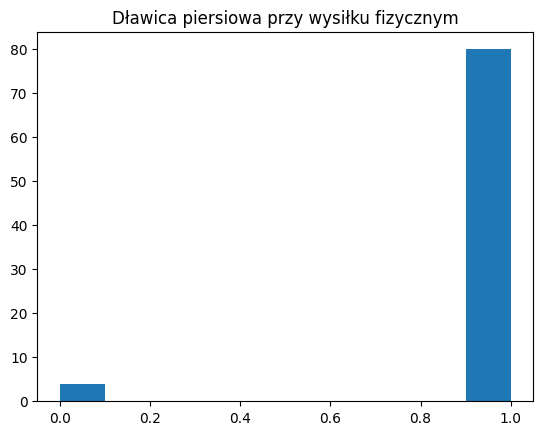

In [ ]:
plt.hist(dis1['exang'])
plt.title('Dławica piersiowa przy wysiłku fizycznym')
plt.show()

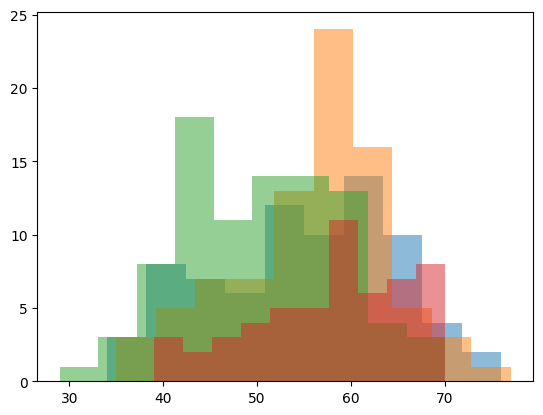

In [ ]:
plt.hist(dis0['age'], alpha = 0.5)
plt.hist(dis1['age'], alpha = 0.5)
plt.hist(dis2['age'], alpha = 0.5)
plt.hist(dis3['age'], alpha = 0.5)
plt.show()

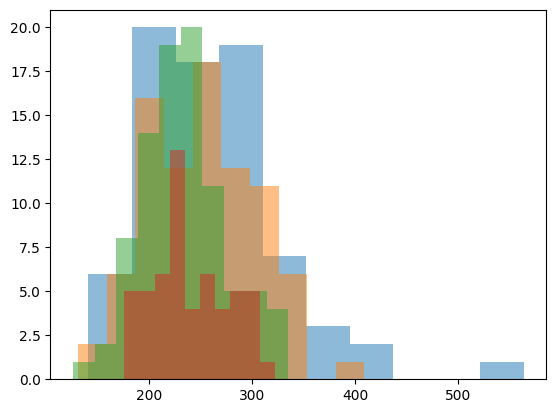

In [ ]:
plt.hist(dis0['chol'], alpha = 0.5)
plt.hist(dis1['chol'], alpha = 0.5)
plt.hist(dis2['chol'], alpha = 0.5)
plt.hist(dis3['chol'], alpha = 0.5)
plt.show()

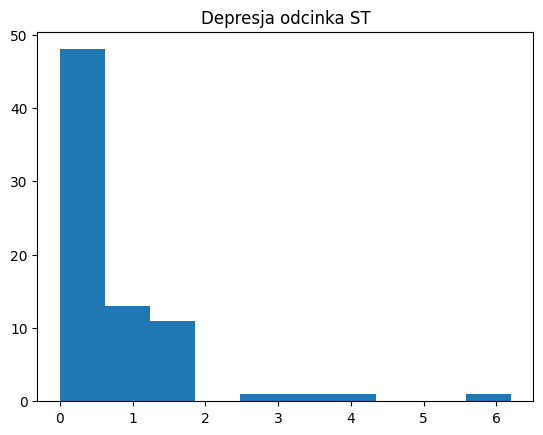

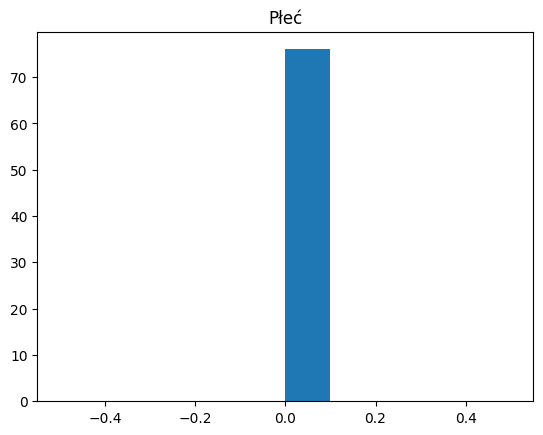

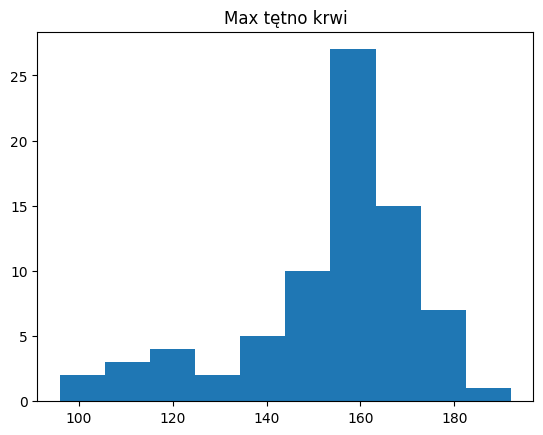

In [ ]:
plt.hist(dis0['oldpeak'])
plt.title('Depresja odcinka ST')
plt.show()
plt.hist(dis0['sex'])
plt.title('Płeć')
plt.show()
plt.hist(dis0['thalach'])
plt.title('Max tętno krwi')
plt.show()

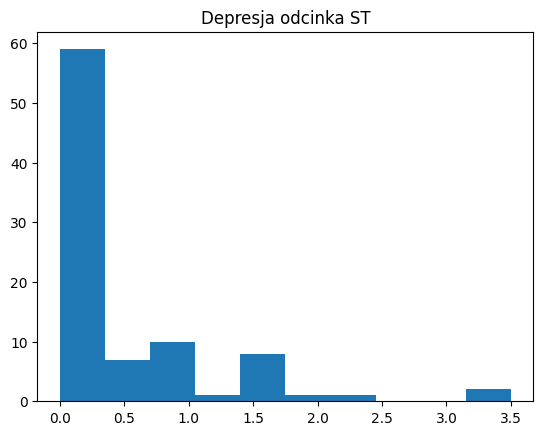

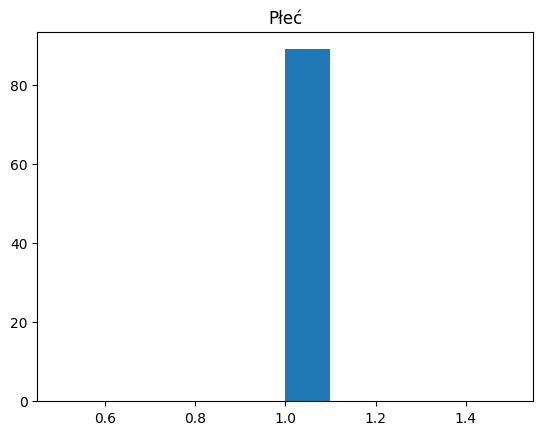

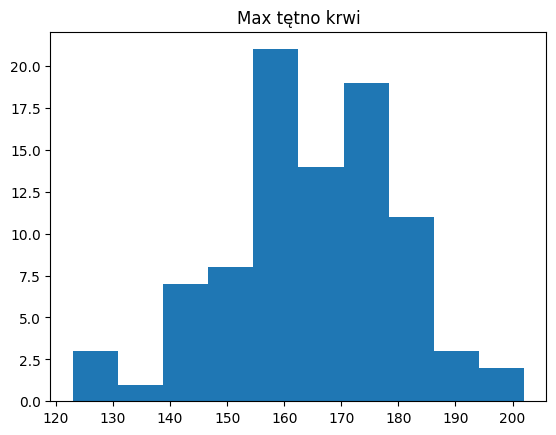

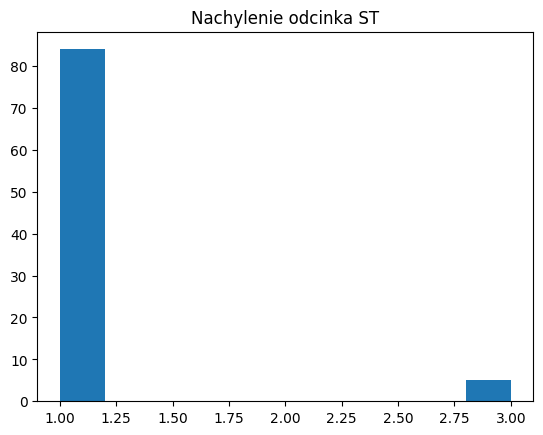

In [ ]:
plt.hist(dis2['oldpeak'])
plt.title('Depresja odcinka ST')
plt.show()
plt.hist(dis2['sex'])
plt.title('Płeć')
plt.show()
plt.hist(dis2['thalach'])
plt.title('Max tętno krwi')
plt.show()
plt.hist(dis2['slope'])
plt.title('Nachylenie odcinka ST')
plt.show()

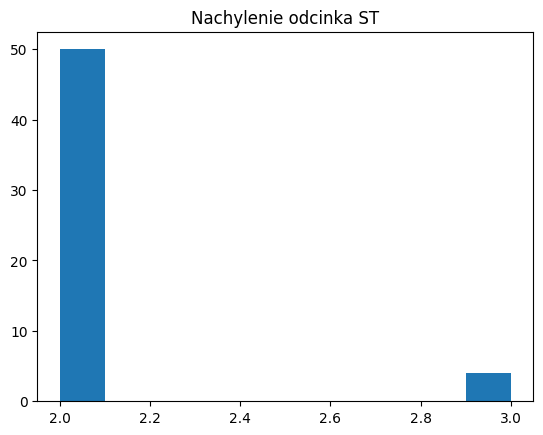

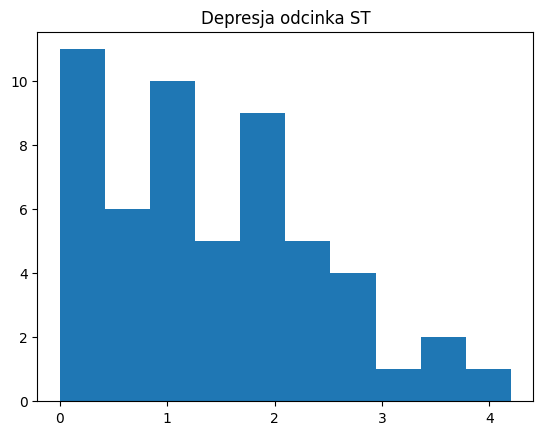

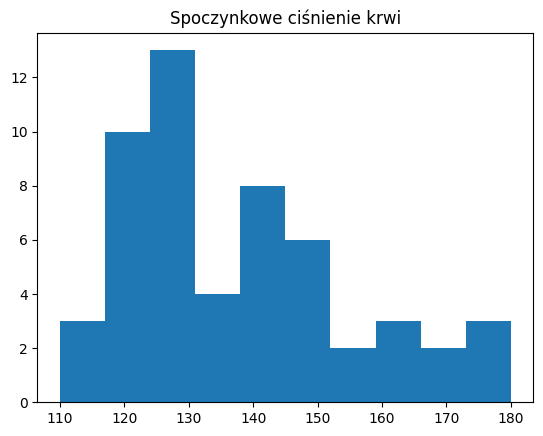

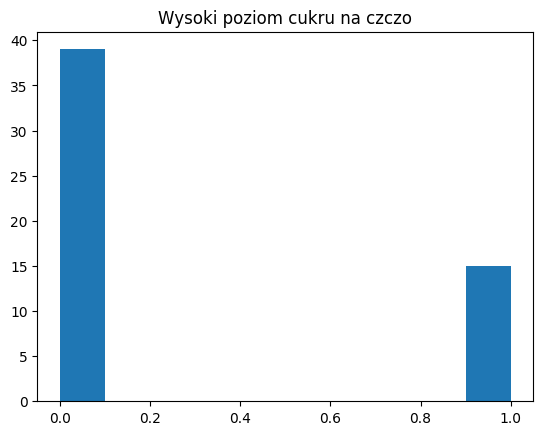

In [ ]:
plt.hist(dis3['slope'])
plt.title('Nachylenie odcinka ST')
plt.show()
plt.hist(dis3['oldpeak'])
plt.title('Depresja odcinka ST')
plt.show()
plt.hist(dis3['trestbps'])
plt.title('Spoczynkowe ciśnienie krwi')
plt.show()
plt.hist(dis3['fbs'])
plt.title('Wysoki poziom cukru na czczo')
plt.show()